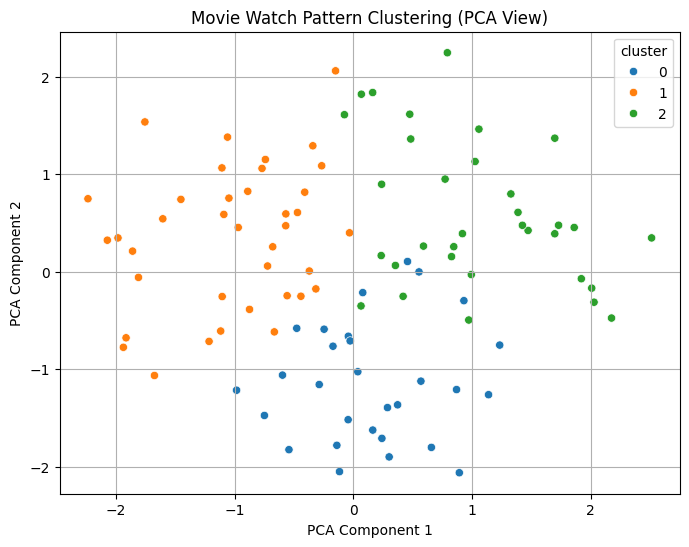

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/movie_watch.csv")

# Encode categorical column
label_encoder = LabelEncoder()
df['genre_encoded'] = label_encoder.fit_transform(df['genre_preference'])

# Select features for clustering
features = df[['watch_time_hour', 'genre_encoded', 'avg_rating_given']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='tab10')
plt.title('Movie Watch Pattern Clustering (PCA View)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()
